In [3]:
import json
import os
import pprint
import random as rd

import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity
from torch.utils.data import random_split

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import umap
import plotly.express as px

from sklearn.decomposition import PCA

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from file_manager import combine_pt_files, get_combined_files, sample, split_on_label, cosine_similarity, pre_process, plot_similarity, plot_clusters, cluster, cosine_similarity_for_both_classes

In [4]:
cwd = os.getcwd()
files = get_combined_files(cwd)

block = files[0]

filename = block.split('/')[-2]
print('Analyzing:', filename)

data = torch.load(block, map_location=device)
# sample the data
pos_label, neg_label = pre_process(data)

IndexError: list index out of range

In [ ]:
print(pos_label[0].keys()) 

dict_keys(['step', 'position', 'tensors', 'is_stuck', 'orientation'])


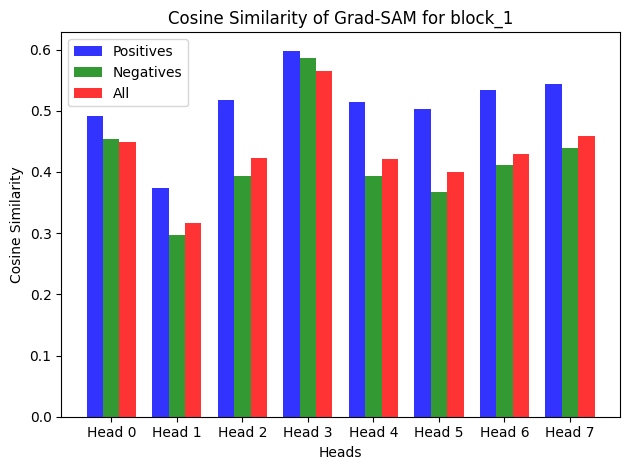

In [ ]:
# get the tensors from the samples
pos_sample = [step_data['tensors'] for step_data in pos_label]
neg_sample = [step_data['tensors'] for step_data in neg_label]
all_tensors = pos_sample + neg_sample

block_1_tensors = {
    'pos_tensors': pos_sample,
    'neg_tensors': neg_sample
}

avg_pos_sim = cosine_similarity(block_1_tensors['pos_tensors'])
avg_neg_sim = cosine_similarity(block_1_tensors['neg_tensors'])
avg_all_sim = cosine_similarity_for_both_classes(block_1_tensors['pos_tensors'], block_1_tensors['neg_tensors'])

#print('average positive similarity:', avg_pos_sim)
#print('average negative similarity:', avg_neg_sim)
#print('average all similarity:', avg_all_sim)

plot_similarity(filename, avg_pos_sim, avg_neg_sim, avg_all_sim)

In [ ]:
cluster(data)

TypeError: list indices must be integers or slices, not str